In [11]:
#To start you have to import the library pyvo
# it is also possible to use astroquery if you want
import pyvo


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
## To perform a TAP query you have to connect to the service first
tap_service = pyvo.dal.TAPService('https://vo.astron.nl/__system__/tap/run/tap')


# The TAPService object provides some introspection that allow you to check
# the various tables and their description
# for example to print the available tables you can execute

print('Tables present on https://vo.astron.nl')
for table in tap_service.tables:
    print(table.name)    

Tables present on https://vo.astron.nl
apertif_dr1.beam_cubes
apertif_dr1.pol_cubes
apertif_dr1.spectral_cubes
apertif_dr1.raw_visibilities
apertif_dr1.flux_cal_visibilities
apertif_dr1.pol_cal_visibilities
apertif_dr1.calibrated_visibilities
apertif_dr1.continuum_images
hetdex.hetdex_images
hetdex.img_main
ivoa.obscore
lbcs.main
lofartier1.main
lofartier1.img_main
msss.img_main
mvf.main
mvf.msssvf_img_main
sauron.main
sauron.mom0
tap_schema.schemas
tap_schema.tables
tap_schema.columns
tap_schema.keys
tap_schema.key_columns
tap_schema.groups
tgssadr.img_main
tgssadr.main


In [3]:
# or get the column names
print([col.name for col in tap_service.tables['apertif_dr1.continuum_images'].columns])

['accref', 'owner', 'embargo', 'mime', 'accsize', 'centeralpha', 'centerdelta', 'imagetitle', 'instid', 'dateobs', 'naxes', 'pixelsize', 'pixelscale', 'refframe', 'wcs_equinox', 'wcs_projection', 'wcs_refpixel', 'wcs_refvalues', 'wcs_cdmatrix', 'bandpassid', 'bandpassunit', 'bandpassrefval', 'bandpasshi', 'bandpasslo', 'pixflags', 'coverage', 'target', 'obsid', 'related_products', 'valid', 'task_id', 'beam_number', 'freqmin', 'freqmax', 'n_channels', 'pub_did', 'pipeline_name', 'pipeline_version', 'sigma_in', 'sigma_out', 'r', 'maxneg', 'ex_2']


In [4]:
# or their description
print([(col.name, col.description) for col in tap_service.tables['apertif_dr1.continuum_images'].columns])

[('accref', 'Access key for the data'), ('owner', 'Owner of the data'), ('embargo', 'Date the data will become/became public'), ('mime', 'MIME type of the file served'), ('accsize', 'Size of the data in bytes'), ('centeralpha', 'Approximate center of image, RA'), ('centerdelta', 'Approximate center of image, Dec'), ('imagetitle', 'Synthetic name of the image'), ('instid', 'Identifier of the originating instrument'), ('dateobs', 'Epoch at midpoint of observation'), ('naxes', 'Number of axes in data'), ('pixelsize', 'Number of pixels along each of the axes'), ('pixelscale', 'The pixel scale on each image axis'), ('refframe', 'Coordinate system reference frame'), ('wcs_equinox', 'Equinox of the given coordinates'), ('wcs_projection', 'FITS WCS projection type'), ('wcs_refpixel', 'WCS reference pixel'), ('wcs_refvalues', 'World coordinates at WCS reference pixel'), ('wcs_cdmatrix', 'FITS WCS CDij matrix'), ('bandpassid', 'Freeform name of the bandpass used'), ('bandpassunit', 'Unit of band

In [5]:
## You can obviously perform tap queries accross the whole tap service as an
# example a cone search
result = tap_service.search(
    "SELECT TOP 5 target, beam_number, accref, centeralpha, centerdelta, obsid, DISTANCE(" \
        "POINT('ICRS', centeralpha, centerdelta),"\
        "POINT('ICRS', 208.36, 52.36)) AS dist"\
    " FROM apertif_dr1.continuum_images"  \
    " WHERE 1=CONTAINS("
    "    POINT('ICRS', centeralpha, centerdelta),"\
    "    CIRCLE('ICRS', 208.36, 52.36, 0.08333333)) "\
    " ORDER BY dist ASC"
    )
result

<Table length=5>
  target   beam_number ...   obsid           dist       
                       ...                   deg        
  object      int32    ...   object        float64      
---------- ----------- ... --------- -------------------
m1403+5324           1 ... 190807041 0.00140756943421204
m1403+5324           1 ... 190913045 0.00140756943421204
m1403+5324           1 ... 200106009 0.00140756943421204
m1403+5324           1 ... 200128124 0.00140756943421204
m1403+5324           1 ... 200302074 0.00140756943421204

In [6]:
# The result can also be obtained as an astropy table
astropy_table = result.to_table()
astropy_table

target,beam_number,accref,centeralpha,centerdelta,obsid,dist
,,,deg,deg,,deg
object,int32,object,float64,float64,object,float64
m1403+5324,1,https://vo.astron.nl/getproduct/APERTIF_DR1/190807041_AP_B001/image_mf_02.fits,208.360378733881,52.3613884370237,190807041,0.00140756943421204
m1403+5324,1,https://vo.astron.nl/getproduct/APERTIF_DR1/190913045_AP_B001/image_mf_01.fits,208.360378733881,52.3613884370237,190913045,0.00140756943421204
m1403+5324,1,https://vo.astron.nl/getproduct/APERTIF_DR1/200106009_AP_B001/image_mf_02.fits,208.360378733881,52.3613884370237,200106009,0.00140756943421204
m1403+5324,1,https://vo.astron.nl/getproduct/APERTIF_DR1/200128124_AP_B001/image_mf_02.fits,208.360378733881,52.3613884370237,200128124,0.00140756943421204
m1403+5324,1,https://vo.astron.nl/getproduct/APERTIF_DR1/200302074_AP_B001/image_mf_02.fits,208.360378733881,52.3613884370237,200302074,0.00140756943421204


In [14]:
## You can also download and plot the image 
import astropy.io.fits as fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import requests, os
import numpy as np

# DOWNLOAD only the first result
#
print('Downloading only the first result')

hdu = fits.open(result[0]['accref'], cache=False)[0]
hdu

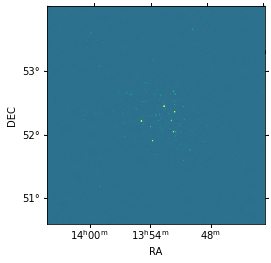

In [17]:
# AND PLOT IT
wcs = WCS(hdu.header)
# dropping unnecessary axes
wcs = wcs.dropaxis(2).dropaxis(2)
plt.subplot(projection=wcs)
plt.imshow(hdu.data[0, 0, :, :], vmax=0.0005)
plt.xlabel('RA')
plt.ylabel('DEC')